In [1]:
import torch
import numpy as np

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Patch
import webcolors

import sys
sys.path.append('/opt/ml/segmentation/semantic-segmentation-level2-cv-06/')
from utils import label_accuracy_score, add_hist, class_colormap, label_to_color_image
from dataset import CustomDataLoader, collate_fn,\
                train_transform, val_transform, test_transform,\
                category_names

In [2]:
plt.rcParams['axes.grid'] = False

In [3]:
root_path  = '../input/data'

In [4]:
# train.json / validation.json / test.json 디렉토리 설정
train_path = root_path + '/train.json'
val_path = root_path + '/val.json'
test_path = root_path + '/test.json'
batch_size = 32

train_dataset = CustomDataLoader(data_dir=train_path, mode='train', transform=train_transform)
#val_dataset = CustomDataLoader(data_dir=val_path, mode='val', transform=val_transform)
#test_dataset = CustomDataLoader(data_dir=test_path, mode='test', transform=test_transform)

# DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=False,
                                           num_workers=4,
                                           collate_fn=collate_fn)

# val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
#                                          batch_size=batch_size,
#                                          shuffle=False,
#                                          num_workers=4,
#                                          collate_fn=collate_fn)

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                           batch_size=batch_size,
#                                           num_workers=4,
#                                           collate_fn=collate_fn)

loading annotations into memory...
Done (t=3.62s)
creating index...
index created!


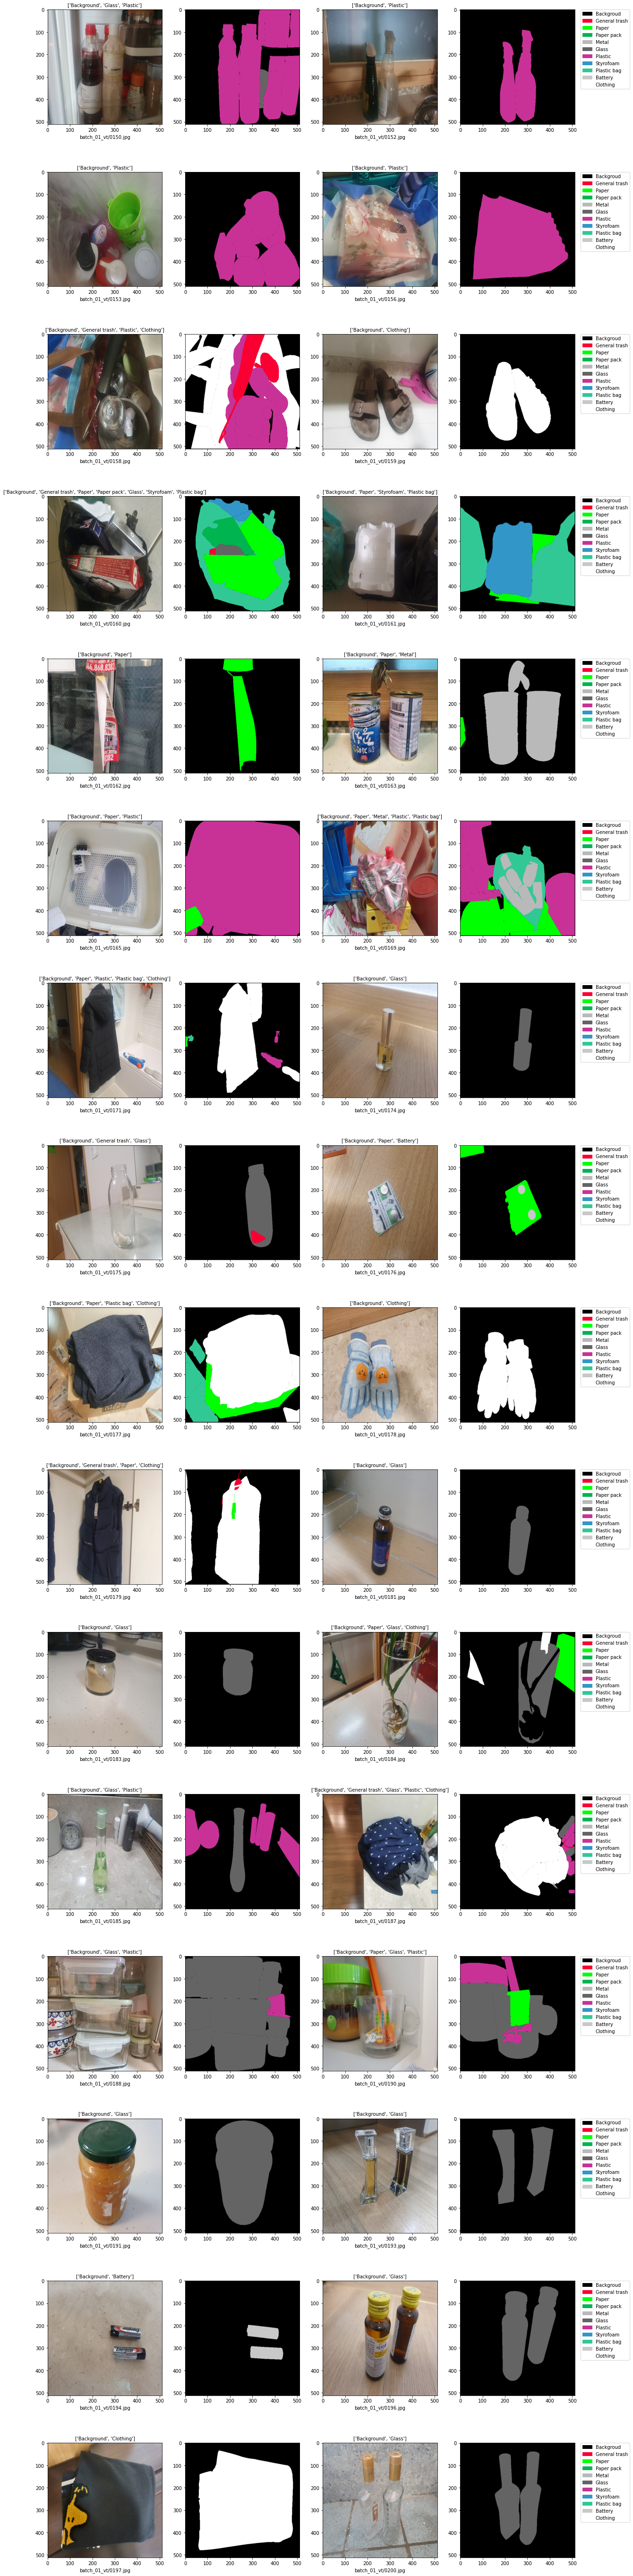

In [5]:
select_batch = 3

if not (0 <= select_batch < len(train_loader)):
    raise Exception("select_batch index error")

for i, (imgs, masks, image_infos) in enumerate(train_loader):
    #print(len(imgs))
    if i < select_batch:
        continue

    category_and_rgb = [[category, (r,g,b)] for idx, (category, r, g, b) in enumerate(class_colormap.values)]
    legend_elements = [Patch(facecolor=webcolors.rgb_to_hex(rgb), 
                            edgecolor=webcolors.rgb_to_hex(rgb), 
                            label=category) for category, rgb in category_and_rgb]

    fig, ax = plt.subplots(nrows=16, ncols=4, figsize=(20, 100))
    # train_loader의 output 결과(image 및 mask) 확인
    for i in range(len(imgs)):
        temp_image_infos = image_infos[i]
        temp_images = imgs[i]
        temp_masks = masks[i]
        
        ax[int(i//2),0 + (i%2)*2].imshow(temp_images.permute([1,2,0]))
        ax[int(i//2),0 + (i%2)*2].grid(False)
        ax[int(i//2),0 + (i%2)*2].set_title("{}".format([category_names[int(i)] for i in list(np.unique(temp_masks))]), fontsize = 10)
        ax[int(i//2),0 + (i%2)*2].set_xlabel(temp_image_infos['file_name'])

        ax[int(i//2),1 + (i%2)*2].imshow(label_to_color_image(temp_masks.detach().cpu().numpy()))
        ax[int(i//2),1 + (i%2)*2].grid(False)
        #ax[int(i//2),1 + (i%2)*2].set_title("{}".format([{int(i),category_names[int(i)]} for i in list(np.unique(temp_masks))], fontsize = 5))
        if (i%2)*2 == 2:
            ax[int(i//2),1 + (i%2)*2].legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    break
    
plt.show()